<a href="https://colab.research.google.com/github/rodrygofesantos/visualizacao-dados-python-3385168/blob/main/Nuvem_de_palavras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Digite o caminho da pasta contendo os PDFs: /content/sample_data/Arquivos
Extraindo texto dos PDFs...
Removendo stopwords...
Gerando nuvem de palavras...


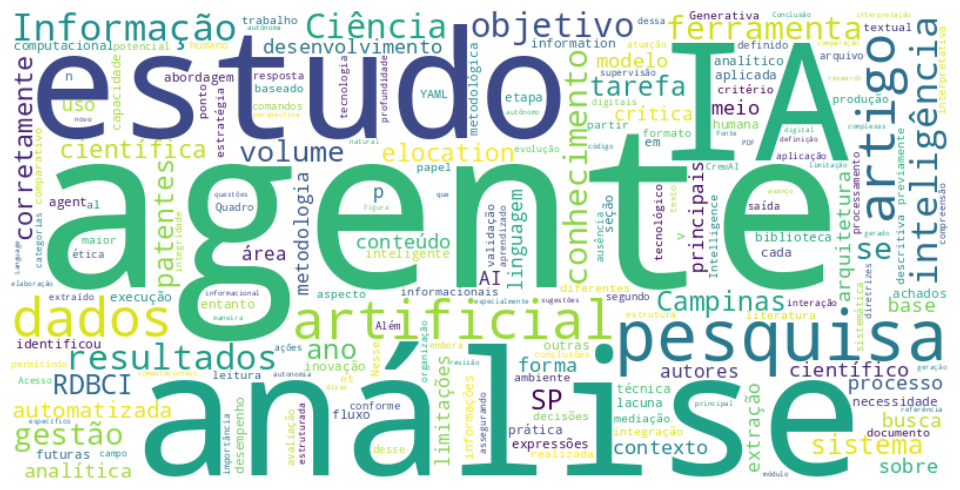

Nuvem de palavras criada com sucesso!


In [2]:
import os
from PyPDF2 import PdfReader
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Configurar caminho alternativo para o nltk_data (caso necessário)
nltk.data.path.append('/Users/rodrigosantos/nltk_data')  # Ajuste para o caminho correto no seu sistema

# Baixar stopwords, caso ainda não tenham sido baixadas
try:
    nltk.download('stopwords')
except Exception as e:
    print(f"Erro ao baixar stopwords: {e}. Verifique sua conexão ou certificados SSL.")

def extract_text_from_pdfs(folder_path):
    """
    Extrai texto de todos os arquivos PDF em uma pasta.

    :param folder_path: Caminho da pasta contendo os PDFs.
    :return: Texto combinado de todos os PDFs.
    """
    text = ""
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pdf'):
            file_path = os.path.join(folder_path, file_name)
            reader = PdfReader(file_path)
            for page in reader.pages:
                text += page.extract_text() + " "
    return text


def remove_stopwords(text, language='portuguese'):
    """
    Remove as stopwords do texto.

    :param text: Texto de entrada.
    :param language: Idioma para as stopwords (default: 'portuguese').
    :return: Texto sem as stopwords.
    """
    try:
        stop_words = set(stopwords.words(language))
    except LookupError:
        print("Erro ao carregar as stopwords. Verifique se o pacote está instalado corretamente.")
        return text  # Retorna o texto original, caso não consiga remover as stopwords

    words = text.split()
    filtered_text = " ".join(word for word in words if word.lower() not in stop_words)
    return filtered_text


def generate_wordcloud(text, output_file="wordcloud.png"):
    """
    Gera uma nuvem de palavras a partir de um texto.

    :param text: Texto de entrada.
    :param output_file: Nome do arquivo para salvar a imagem da nuvem de palavras.
    """
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False
    ).generate(text)

    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()

    # Salvar a nuvem de palavras
    plt.savefig(output_file)
    plt.show()


def main():
    folder_path = input("Digite o caminho da pasta contendo os PDFs: ")
    if not os.path.isdir(folder_path):
        print("Caminho inválido. Verifique e tente novamente.")
        return

    print("Extraindo texto dos PDFs...")
    text = extract_text_from_pdfs(folder_path)

    if text.strip():
        print("Removendo stopwords...")
        text_without_stopwords = remove_stopwords(text)

        print("Gerando nuvem de palavras...")
        generate_wordcloud(text_without_stopwords)
        print("Nuvem de palavras criada com sucesso!")
    else:
        print("Nenhum texto foi encontrado nos PDFs fornecidos.")


if __name__ == "__main__":
    main()

